In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras

In [80]:
heart_data = pd.read_csv("./data/processed.cleveland.data", names=["age", "sex", "cp", "trestbps", "chol",
                                                        "fbs", "restecg", "thalach", "exang", "oldpeak",
                                                        "slope", "ca", "thal", "num"])

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [81]:
total_records = len(heart_data)

print(f"Total number of records in the Dataframe: {total_records}")
for col in heart_data.columns:
    records = len(heart_data.loc[heart_data[col] == "?"])
    print(f"Number of missing in {col}: {records}")

Total number of records in the Dataframe: 303
Number of missing in age: 0
Number of missing in sex: 0
Number of missing in cp: 0
Number of missing in trestbps: 0
Number of missing in chol: 0
Number of missing in fbs: 0
Number of missing in restecg: 0
Number of missing in thalach: 0
Number of missing in exang: 0
Number of missing in oldpeak: 0
Number of missing in slope: 0
Number of missing in ca: 4
Number of missing in thal: 2
Number of missing in num: 0


In [84]:
heart_data = heart_data.replace("?", np.nan)

heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [85]:
heart_data = heart_data.dropna()

heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [86]:
features = heart_data.drop("num", axis=1)

target = heart_data[["num"]]

In [95]:
target["num"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [176]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

target = lb.fit_transform(target)

In [177]:
categorical_features = heart_data[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].copy()

numerical_features = heart_data[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]].copy()

categorical_features.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1.0,1.0,1.0,2.0,0.0,3.0,6.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,7.0
3,1.0,3.0,0.0,0.0,0.0,3.0,3.0
4,0.0,2.0,0.0,2.0,0.0,1.0,3.0


In [178]:
sc = StandardScaler()

numerical_features = pd.DataFrame(data=sc.fit_transform(numerical_features),
                                 columns=numerical_features.columns,
                                 index= numerical_features.index)

In [179]:
processed_features = pd.concat([categorical_features, numerical_features], axis=1, sort=False)

processed_features.head()

,sex,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalach,oldpeak,ca
0,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425
2,1.0,4.0,0.0,2.0,1.0,2.0,7.0,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625
3,1.0,3.0,0.0,0.0,0.0,3.0,3.0,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976
4,0.0,2.0,0.0,2.0,0.0,1.0,3.0,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976


In [180]:
X_train, X_test, y_train, y_test = train_test_split(processed_features,
                                                   target,
                                                   test_size=0.2,
                                                   random_state=1)

In [181]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.15,
                                                 random_state=10)

In [182]:
X_train.shape, X_test.shape, X_val.shape

((201, 13), (60, 13), (36, 13))

In [183]:
y_train.shape, y_test.shape, y_val.shape

((201, 5), (60, 5), (36, 5))

In [305]:
def build_model():
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    
    dense_layer1 = layers.Dense(8, activation="relu")
    x = dense_layer1(inputs)
    
#     dense_layer2 = layers.Dense(8, activation="relu")
#     x = dense_layer2(x)
    
    prediction_layer = layers.Dense(5, activation="softmax")
    prediction = prediction_layer(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=prediction)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])
    return model
    

In [306]:
model = build_model()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_136 (Dense)           (None, 8)                 112       
                                                                 
 dense_137 (Dense)           (None, 5)                 45        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


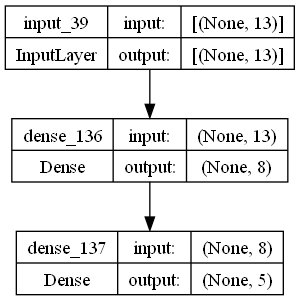

In [307]:
keras.utils.plot_model(model, show_shapes=True)

In [308]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train.values.astype(np.float32), y_train.astype(np.float32)))
dataset_train = dataset_train.batch(16)
dataset_train.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [309]:
dataset_val = tf.data.Dataset.from_tensor_slices((X_val.values.astype(np.float32), y_val.astype(np.float32)))
dataset_val = dataset_val.batch(16)


In [314]:
model = build_model()
training_history = model.fit(dataset_train, epochs=50, validation_data=dataset_val)

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_142 (Dense)           (None, 8)                 112       
                                                                 
 dense_143 (Dense)           (None, 5)                 45        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 1.7123 - accuracy: 0.1692 - val_loss: 1.5992 - val_accuracy: 0.3611
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 1.5829 - accuracy: 0.2587 - val_loss: 1.5317 - val_accuracy: 0.3333
Ep

In [315]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [316]:
score = model.evaluate(X_test.values.astype(np.float32), y_test)

score_df = pd.Series(score, index=model.metrics_names)

score_df

2/2 [==============================] - 0s 8ms/step - loss: 1.1384 - accuracy: 0.5000


loss        1.138388
accuracy    0.500000
dtype: float64

In [319]:
y_pred = model.predict(X_test.values.astype(np.float32))
y_pred[:10]

2/2 [==============================] - 0s 0s/step


array([[0.9434819 , 0.03787346, 0.00581687, 0.00625234, 0.00657541],
       [0.14849567, 0.31180137, 0.22201155, 0.241111  , 0.07658039],
       [0.6591726 , 0.24333031, 0.04757586, 0.03486446, 0.01505674],
       [0.9529295 , 0.03257973, 0.00501118, 0.00358233, 0.00589729],
       [0.12617442, 0.2569195 , 0.20726104, 0.25740504, 0.15223992],
       [0.26295912, 0.25188154, 0.0657539 , 0.27884352, 0.14056195],
       [0.67725915, 0.20474029, 0.04411494, 0.04746744, 0.0264182 ],
       [0.02792454, 0.20090987, 0.09204609, 0.5219132 , 0.15720622],
       [0.0599463 , 0.08820944, 0.40400797, 0.22500949, 0.22282682],
       [0.01880516, 0.04498926, 0.40869638, 0.2591707 , 0.2683384 ]],
      dtype=float32)

In [320]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)
y_pred = np.where(y_pred < 0.5, 0, y_pred)

y_pred[:10]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)